# image alignment
## using color-photographs


In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns


In [2]:
def temp_to_pd( temp, f_t='f', r=2 ):
	if temp < 20 and temp >= -60:
		pr = ( -64.67 / ( -.57 + temp )) if f_t == 'f' else ( -32.33 / ( -.68 + temp ))
		return round( pr*2, r )
	else:
		return np.NAN

def temp_to_pd_thaw( temp ):
    return temp_to_pd( temp, f_t='t' )
def temp_to_pd_freeze( temp ):
    return temp_to_pd( temp, f_t='f' )

def pd_to_temp( hf, f_t='f', r=2 ):
	result = (2 * -64.67)/hf + .57 if f_t == 'f' else (2 * -32.33)/hf + .68
	return round( result, r )

def plot_pd( dataframes, f_t = 'f', pd_min_max = [1.1,120], x_ticks = [1,10,100] ):
	f_t_label = 'Freeze curve' if f_t == 'f' else 'Thaw curve'
	x_tick_labels = []
	for x in x_ticks:
		x_tick_labels.append( pd_to_temp(x, f_t, 1) )
	formatter = ScalarFormatter()
	formatter.set_scientific(False)
	for specimen, ages in dataframes.items():
		max_hf = np.nan
		min_hf = np.nan
		fig = plt.figure()
		for name, ft_dfs in ages.items():
			df = ft_dfs[f_t].loc[(ft_dfs[f_t]['pore diameter in nm'] <= pd_min_max[1]+.1) & (ft_dfs[f_t]['pore diameter in nm'] >= pd_min_max[0]-.1)]
			max_hf_spec = df['Heat flow in mW/mg'].max()
			min_hf_spec = df['Heat flow in mW/mg'].min()
			if max_hf is np.nan or max_hf < max_hf_spec:
				max_hf = max_hf_spec
			if min_hf is np.nan or min_hf > min_hf_spec:
				min_hf = min_hf_spec

		margin = 0.05*(max_hf-min_hf)
		max_hf += margin
		min_hf -= margin

		plt.vlines(temp_to_pd(0, f_t), min_hf, max_hf, linestyle="dashed", color="red")
		plt.vlines(temp_to_pd(-40, f_t), min_hf, max_hf, linestyle="dashed", color="red")
		for name, ft_dfs in ages.items():
			df = ft_dfs[f_t].loc[(ft_dfs[f_t]['pore diameter in nm'] <= pd_min_max[1]+.1) & (ft_dfs[f_t]['pore diameter in nm'] >= pd_min_max[0]-.1)]
			plt.plot(df['pore diameter in nm'], df['Heat flow in mW/mg'], label="{}, {} d".format( specimen, name))

		plt.title("{}, {}".format(specimen, f_t_label))
		plt.ylabel('Heat flow in mW/mg')
		if f_t == 'f': plt.ylim(max_hf, min_hf)
		else: plt.ylim(min_hf,max_hf)
		plt.tight_layout()
		plt.legend()
		ax1 = plt.gca()
		ax1.set_xscale('log')
		ax1.set_xticks(x_ticks)
		ax1.set_xlim(pd_min_max[0],pd_min_max[1])
		ax1.set_xlabel('pore diameter in nm')
		ax1.xaxis.set_major_formatter(formatter)
		ax2 = ax1.twiny()
		ax2.set_xscale('log')
		ax2.set_xticks(x_ticks, x_tick_labels )
		ax2.set_xlim(pd_min_max[0],pd_min_max[1])
		ax2.set_xlabel('Temperature in °C')

		plt.show()

def plot_temp( dataframes, f_t = 'f', min_max = [-60,20], x_ticks = [-60,-40,-20,0,20] ):
	f_t_label = 'Freeze curve' if f_t == 'f' else 'Thaw curve'
	x_tick_labels = []
	for x in x_ticks:
		x_tick_labels.append( temp_to_pd(x, f_t,1) )
	formatter = ScalarFormatter()
	formatter.set_scientific(False)
	for specimen, ages in dataframes.items():
		max_hf = np.nan
		min_hf = np.nan
		fig = plt.figure()
		for name, ft_dfs in ages.items():
			df = ft_dfs[f_t]#.loc[(ft_dfs[f_t]['Temperature in °C'] <= min_max[1]+.1) & (ft_dfs[f_t]['Temperature in °C'] >= min_max[0]-.1)]
			max_hf_spec = df['Heat flow in mW/mg'].max()
			min_hf_spec = df['Heat flow in mW/mg'].min()
			if max_hf is np.nan or max_hf < max_hf_spec:
				max_hf = max_hf_spec
			if min_hf is np.nan or min_hf > min_hf_spec:
				min_hf = min_hf_spec

		margin = 0.05*(max_hf-min_hf)
		max_hf += margin
		min_hf -= margin

		plt.vlines(0, min_hf, max_hf, linestyle="dashed", color="red")
		plt.vlines(-40, min_hf, max_hf, linestyle="dashed", color="red")
		for name, ft_dfs in ages.items():
			df = ft_dfs[f_t]
			plt.plot(df['Temperature in °C'], df['Heat flow in mW/mg'], label="{}, {} d".format( specimen, name ))
		plt.title("{}, {}".format(specimen, f_t_label))
		plt.ylabel('Heat flow in mW/mg')
		if f_t == 'f': plt.ylim(max_hf, min_hf)
		else: plt.ylim(min_hf,max_hf)
		plt.tight_layout()
		plt.legend()
		ax1 = plt.gca()
		#ax1.set_xticks(x_ticks)
		ax1.set_xlim(min_max[0],min_max[1])
		ax1.set_xlabel('Temperature in °C')
		ax2 = ax1.twiny()
		ax2.set_xticks(x_ticks, x_tick_labels )
		ax2.set_xlim(min_max[0],min_max[1])
		ax2.set_xlabel('pore diameter in nm')


		ax2.yaxis.label.set_color('red')
		ax2.xaxis.label.set_color('red')
		ax2.tick_params(axis='y', colors='red')
		ax2.tick_params(axis='x', colors='red')
		ax2.spines['top'].set_color('red')
		ax2.spines['right'].set_color('red')

		plt.show()

In [10]:
l =    []
for i in [2.5,5,10,25,50]: 
    l.append(pd_to_temp(i, 'f', 1))
print(l)

[-51.2, -25.3, -12.4, -4.6, -2.0]


In [3]:
temp_to_pd( -40, f_t='f', r=2 )

3.19

In [3]:
paths = {
	# 'Alit' : {
	# 	'EP1 7':'ExpDat_EP1 Wdh2.txt',
	# 	'EP2 7':'ExpDat_EP2_Wdh.txt',
	# 	'EP1 28':'ExpDat_EP1_28d.txt',
	# 	'EP5 28':'ExpDat_EP5_28d.txt',
	# 	'EP6 28':'ExpDat_EP6_28d.txt',
	# },
	'Belit' : {
		'14':'ExpDat_C2S 14d_1.txt',
		'28':'ExpDat_C2S 28d_nicht_abgestoppt.txt',
	}
}


dataframes={}
for folder, tables in paths.items():
	dataframes[folder] = {}
	path = "./" + folder + "/"
	for name, file in tables.items():
		print(folder, name )
		dataframes[folder][name] = {'f':None, 't':None}
		file_path = path + file
		with open(file_path,encoding='cp1252') as myFile:
			num_found = -1
			for num, line in enumerate(myFile, 0):
				if num_found > 0:
					decimal = '.' if '.' in line else ','
					delimiter = ';' if ';' in line else "\t"
					break
				elif '##Temp' in line:
					#print( 'found at line:', num)
					num_found = num
		df = pd.read_csv(file_path, skiprows=num_found, encoding='mbcs', delimiter=delimiter, decimal=decimal)
		df.rename(columns={'##Temp./°C': 'Temperature in °C', 'DSC/(mW/mg)': 'Heat flow in mW/mg'}, inplace=True)
		df_thraw  = df.loc[df['Segment'] == df.Segment.max()].copy()
		df_freeze = df.loc[df['Segment'] == df.Segment.max()-2].copy()
		df_thraw['pore diameter in nm']  = df_thraw['Temperature in °C'].apply(temp_to_pd_thaw)
		df_freeze['pore diameter in nm'] = df_freeze['Temperature in °C'].apply(temp_to_pd_freeze)
		dataframes[folder][name]['f'] = df_freeze
		dataframes[folder][name]['t'] = df_thraw

Belit 14
Belit 28


In [14]:
path_freeze = './Alit/Gefrieren60.csv'
path_thaw   = './Alit/Tauen60.csv'
experiments = {
	'Alit' : {
		'LT-DSC 1' :'1d',
		'LT-DSC 7' :'7d',
		'LT-DSC 28':'28d',
	},
}

dff = pd.read_csv(path_freeze, encoding='mbcs', delimiter=';', decimal=',')
dft = pd.read_csv(path_thaw,   encoding='mbcs', delimiter=';', decimal=',')
for folder, tables in experiments.items():
	if not folder in dataframes: dataframes[folder] = {}
	for name, age in tables.items():
		print(folder, name )
		dataframes[folder][name] = {'f':None, 't':None}
		df_freeze = dff[["Temp Alit "+age,"DSC Alit "+age]].copy()
		df_thaw   = dft[["Temp Alit "+age,"DSC Alit "+age]].copy()
		df_freeze.rename(columns={"Temp Alit "+age: 'Temperature in °C', "DSC Alit "+age: 'Heat flow in mW/mg'}, inplace=True)
		df_thaw.rename(columns={"Temp Alit "+age: 'Temperature in °C', "DSC Alit "+age: 'Heat flow in mW/mg'}, inplace=True)

		df_freeze['pore diameter in nm'] = df_freeze['Temperature in °C'].apply(temp_to_pd_freeze)
		df_thaw['pore diameter in nm']   = df_thaw['Temperature in °C'].apply(temp_to_pd_thaw)

		dataframes[folder][name]['f'] = df_freeze
		dataframes[folder][name]['t'] = df_thaw

Alit LT-DSC 1
      Temperature in °C  Heat flow in mW/mg  pore diameter in nm
0             -59.97144            0.002182                 1.07
1             -59.93813            0.003674                 1.07
2             -59.88324            0.004184                 1.07
3             -59.83095            0.004149                 1.07
4             -59.78143            0.003971                 1.07
...                 ...                 ...                  ...
1595           19.75316            0.016294                -3.39
1596           19.80290            0.016355                -3.38
1597           19.85249            0.016432                -3.37
1598           19.90282            0.016392                -3.36
1599           19.95253            0.016360                -3.36

[1600 rows x 3 columns]
Alit LT-DSC 7
      Temperature in °C  Heat flow in mW/mg  pore diameter in nm
0             -59.96954            0.001360                 1.07
1             -59.93732            0.

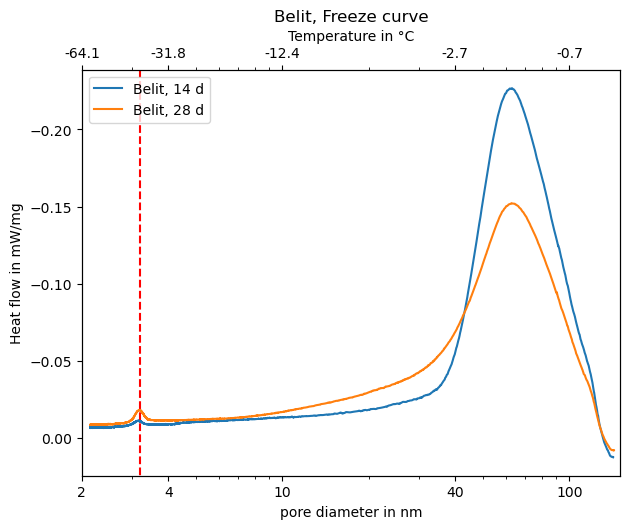

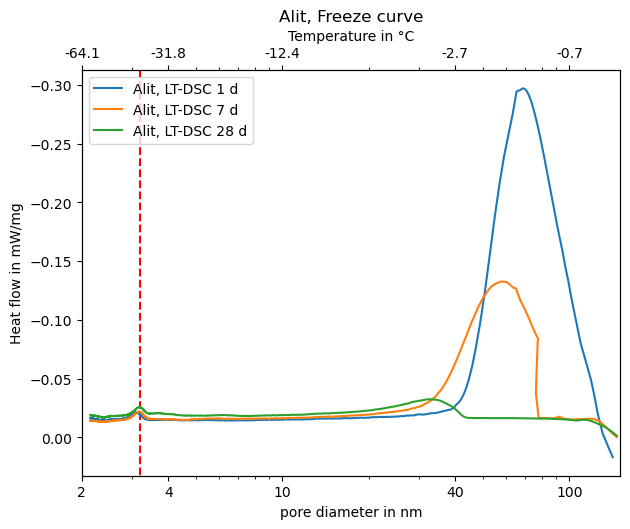

In [15]:
plot_pd( dataframes, f_t = 'f', pd_min_max = [2,150], x_ticks = [2,4,10,40,100] )

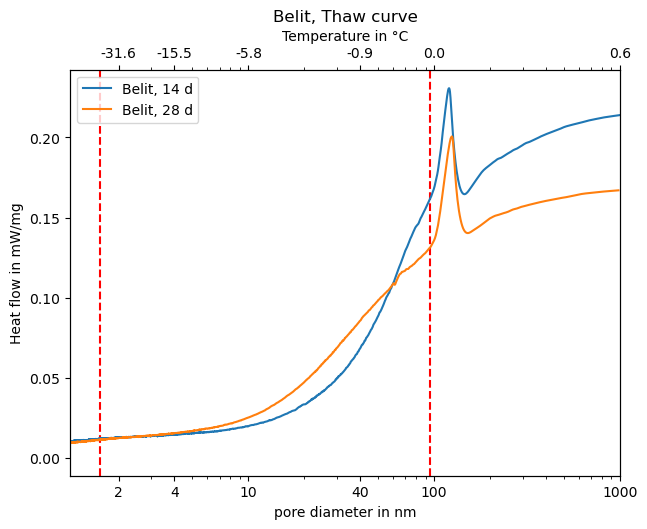

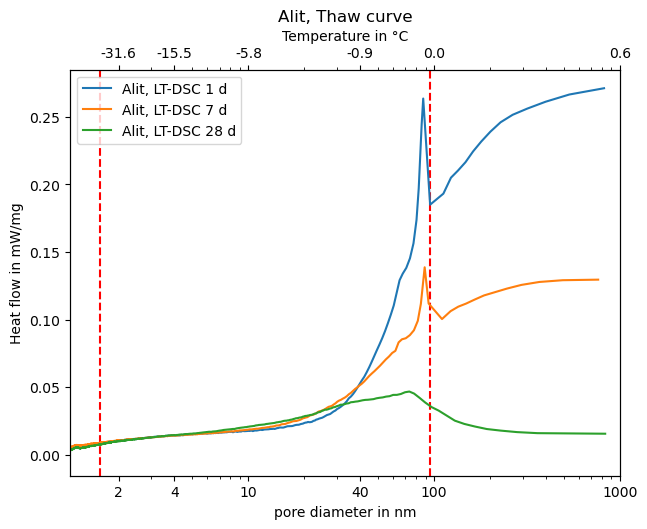

In [17]:
plot_pd( dataframes, f_t = 't', pd_min_max = [1.1,1000], x_ticks = [2,4,10,40,100,1000] )

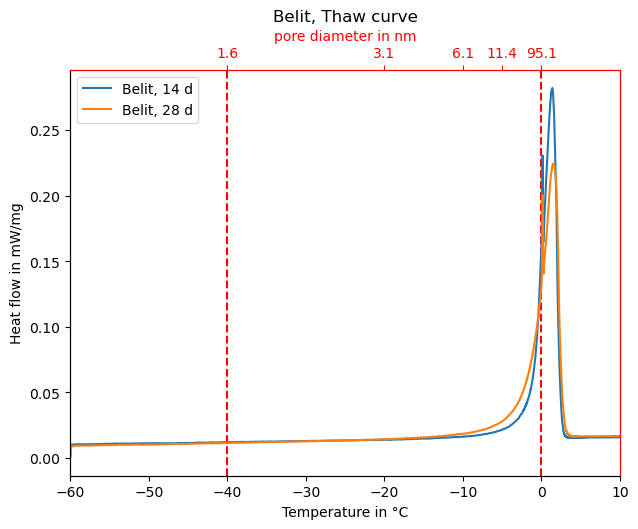

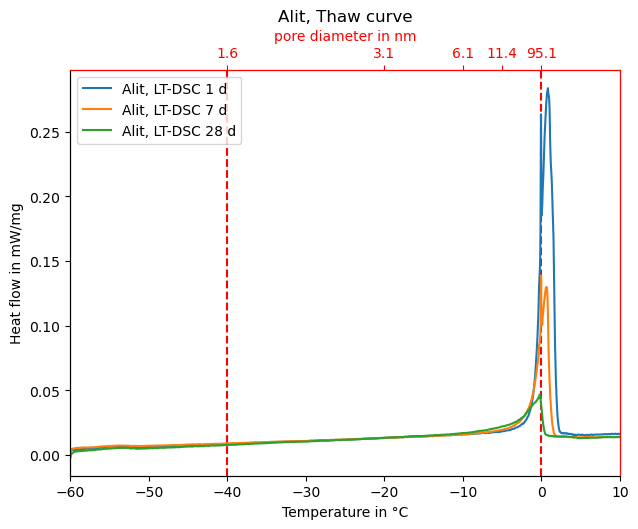

In [18]:
plot_temp( dataframes, f_t = 't', min_max = [-60,10], x_ticks=[-40,-20,-10,-5, 0])

In [19]:
from scipy import integrate
"""
f_t = 'f'
pd_min_max = [1.1,120]
for specimen, ages in dataframes.items():
	for name, ft_dfs in ages.items():
		df = ft_dfs[f_t].loc[(ft_dfs[f_t]['pore diameter in nm'] <= pd_min_max[1]+.1) & (ft_dfs[f_t]['pore diameter in nm'] >= pd_min_max[0]-.1)]
		df['integral'] = np.nan

		for index, row in df.iterrows():
			x = integrate.trapz(df['Heat flow in mW/mg'].loc[0:index], x=df['pore diameter in nm'].loc[0:index])
			df.loc[index, 'integral'] = x
		#print( df['integral'] )
		df.plot('pore diameter in nm', 'integral')
		#integral_df = df.apply(lambda g: integrate.trapz(df['pore diameter in nm'], x=df['Heat flow in mW/mg']))"""#
print()

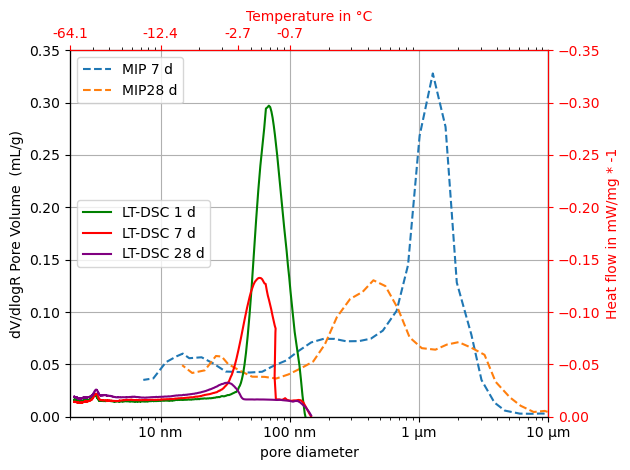

In [56]:
df_hg_7d_c3s = pd.read_csv('./Alit/HG C3S 7d.CSV', encoding='mbcs', delimiter=';', decimal='.')
df_hg_28d_c3s = pd.read_csv('./Alit/HG C3S 28d.CSV', encoding='mbcs', delimiter=';', decimal='.')

df_hg_28d_c3s['Pore Diameter  (µm)'] = df_hg_28d_c3s['Pore Radius  (µm)']*2
df_hg_7d_c3s['Pore Diameter  (µm)'] = df_hg_7d_c3s['Pore Radius  (µm)']*2


formatter = ScalarFormatter()
formatter.set_scientific(False)

fig = plt.figure()
plt.grid(True)

ax1 = plt.gca()
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(formatter)
ax1.set_xlabel('pore diameter')
ax1.set_ylabel('dV/dlogR Pore Volume  (mL/g)')
ax1.set_xlim(2,10000)
ax1.set_ylim(0,0.35)
ax1.set_xticks([10,100,1000,10000], ['10 nm', '100 nm', '1 µm', '10 µm'] )

df = df_hg_7d_c3s.loc[(df_hg_7d_c3s['Pore Diameter  (µm)']<20) & (df_hg_7d_c3s['Pore Diameter  (µm)']>0.0020)]
plt.plot(df['Pore Diameter  (µm)']*1000, df['dV/dlogR Pore Volume  (mL/g)'], label="MIP 7 d", linestyle="dashed")
df = df_hg_28d_c3s.loc[(df_hg_28d_c3s['Pore Diameter  (µm)']<20) & (df_hg_28d_c3s['Pore Diameter  (µm)']>0.0020)]
plt.plot(df['Pore Diameter  (µm)']*1000, df['dV/dlogR Pore Volume  (mL/g)'], label="MIP28 d", linestyle="dashed")

ax2 = ax1.twinx()
ax2.set_ylabel('Heat flow in mW/mg * -1')
ax2.set_ylim(0,-0.35)

colors=['green', 'red', 'purple', 'brown', 'pink',]
f_t = 'f'
specimen = 'Alit'
i=0
for name, age in tables.items():
	df = dataframes[specimen][name][f_t]
	ax2.plot(df['pore diameter in nm'], df['Heat flow in mW/mg'], label="{} d".format(name), color=colors[i])
	i+=1

ax1.legend(loc='upper left')
ax2.legend(loc='center left')

x_ticks = [2,10,40,100]
x_tick_labels = []
for x in x_ticks:
	x_tick_labels.append( pd_to_temp(x, f_t, 1) )
ax3 = ax1.twiny()
ax3.set_xscale('log')
ax3.set_xticks(x_ticks, x_tick_labels )
ax3.set_xlabel('Temperature in °C')
ax3.set_xlim(2,10000)

ax2.yaxis.label.set_color('red')
ax3.xaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax3.tick_params(axis='x', colors='red')
ax3.spines['top'].set_color('red')
ax3.spines['right'].set_color('red')

#plt.title("Alit MIP")
plt.tight_layout()
plt.savefig('alit-ltdsc.svg')
plt.show()

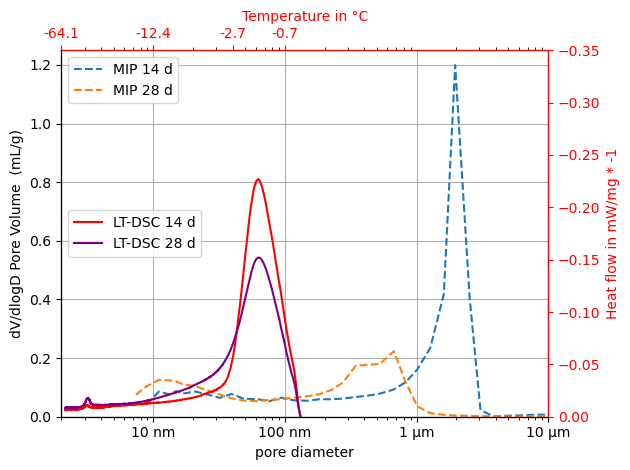

In [58]:
df_hg_14d_c2s = pd.read_csv('./Belit/HG C2S 14d.CSV', encoding='mbcs', delimiter=';', decimal='.')
df_hg_28d_c2s = pd.read_csv('./Belit/HG C2S 28d.CSV', encoding='mbcs', delimiter=';', decimal='.')

formatter = ScalarFormatter()
formatter.set_scientific(False)

fig = plt.figure()
plt.grid(True)

ax1 = plt.gca()
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(formatter)
ax1.set_xlabel('pore diameter')
ax1.set_ylabel('dV/dlogD Pore Volume  (mL/g)')
ax1.set_xlim(2,10000)
ax1.set_ylim(0,1.25)
ax1.set_xticks([10,100,1000,10000], ['10 nm', '100 nm', '1 µm', '10 µm'] )

df = df_hg_14d_c2s.loc[(df_hg_14d_c2s['Pore Diameter  (µm)']<20) & (df_hg_14d_c2s['Pore Diameter  (µm)']>0.0020)]
plt.plot(df['Pore Diameter  (µm)']*1000, df['dV/dlogD Pore Volume  (mL/g)'], label="MIP 14 d", linestyle="dashed")
df = df_hg_28d_c2s.loc[(df_hg_28d_c2s['Pore Diameter  (µm)']<20) & (df_hg_28d_c2s['Pore Diameter  (µm)']>0.0020)]
plt.plot(df['Pore Diameter  (µm)']*1000, df['dV/dlogD Pore Volume  (mL/g)'], label="MIP 28 d", linestyle="dashed")

ax2 = ax1.twinx()
ax2.set_ylabel('Heat flow in mW/mg * -1')
ax2.set_ylim(0,-0.35)

colors=['red', 'purple', 'brown', 'pink',]#'green',
f_t = 'f'
specimen = 'Belit'
i=0
for name, age in dataframes[specimen].items():
	df = dataframes[specimen][name][f_t]
	ax2.plot(df['pore diameter in nm'], df['Heat flow in mW/mg'], label="LT-DSC {} d".format(name), color=colors[i])
	i+=1

ax1.legend(loc='upper left')
ax2.legend(loc='center left')

x_ticks = [2,10,40,100]
x_tick_labels = []
for x in x_ticks:
	x_tick_labels.append( pd_to_temp(x, f_t, 1) )
ax3 = ax1.twiny()
ax3.set_xscale('log')
ax3.set_xticks(x_ticks, x_tick_labels )
ax3.set_xlabel('Temperature in °C')
ax3.set_xlim(2,10000)

ax2.yaxis.label.set_color('red')
ax3.xaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax3.tick_params(axis='x', colors='red')
ax3.spines['top'].set_color('red')
ax3.spines['right'].set_color('red')

#plt.title("Alit MIP")
plt.tight_layout()
plt.savefig('belit-ltdsc.svg')
plt.show()